## **선택 정렬**

In [1]:
array = [7, 5, 9, 0, 3, 1, 6, 2, 4, 8]

for i in range(len(array)):
    min_index = i # 가장 작은 원소의 인덱스
    for j in range(i+1, len(array)):
        if array[min_index] > array[j]:
            min_index = j
    array[i], array[min_index] = array[min_index], array[i] # 스와프

print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## **삽입 정렬**

In [2]:
array = [7, 5, 9, 0, 3, 1, 6, 2, 4, 8]

for i in range(1, len(array)):
    for j in range(i, 0, -1): # 인덱스 i부터 1까지 1씩 감소하며 반복하는 문법
        if array[j] < array[j-1]:
            array[j], array[j-1] = array[j-1], array[j]
        else: # 자기보다 작은 데이터를 만나면 그 위치에서 멈춤
            break
    
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## **퀵 정렬**

**일반적인 방식**

In [1]:
array = [5, 7, 9, 0, 3, 1, 6, 2, 4, 8]

def quick_sort(array, start, end):
    if start >= end: # 원소가 1개인 경우 종료
        return
    pivot = start # 피벗은 첫 번째 원소
    left = start + 1
    right = end
    while (left <= right):
        # 피벗보다 큰 데이터를 찾을 때까지 반복
        while(left <= end and array[left] <= array[pivot]):
            left += 1
        # 피벗보다 작은 데이터를 찾을 때까지 반복
        while(right > start and array[right] >= array[pivot]):
            right -= 1
        if (left > right): # 엇갈렸다면 작은 데이터와 피벗을 교체
            array[right], array[pivot] = array[pivot], array[right]
        else: # 엇갈리지 않았다면 작은 데이터와 큰 데이터를 교체
            array[left], array[right] = array[right], array[left]
    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬 수행
    quick_sort(array, start, right-1)
    quick_sort(array, right+1, end)
    
quick_sort(array, 0, len(array)-1)
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


**파이썬의 장점을 살린 방식**

In [3]:
array = [5, 7, 9, 0, 3, 1, 6, 2, 4, 8]

def quick_sort(array):
    # 리스트가 하나 이하의 원소만을 담고 있다면 종료
    if len(array) <= 1:
        return array
    pivot = array[0] # 피벗을 첫 번째 원소
    tail = array[1:] # 피벗을 제외한 리스트
    
    left_side = [x for x in tail if x<= pivot] # 분할된 왼쪽 부분
    right_side = [x for x in tail if x>= pivot] # 분할된 오른쪽 부분
    
    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬 수행하고, 전체 리스트 반환
    return quick_sort(left_side) + [pivot] + quick_sort(right_side)

print(quick_sort(array))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## **정렬 라이브러리**

In [6]:
array = [7, 5, 9, 0, 3, 1, 6, 2, 4, 8]

result = sorted(array)
print(result)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
# 정렬 라이브러리 키(key) 기준 정렬
array = [('바나나', 2), ('사과', 5), ('당근', 3)]

def setting(data):
    return data[1]

result = sorted(array, key=setting)
print(result)

[('바나나', 2), ('당근', 3), ('사과', 5)]


## **선택 정렬과 기본 정렬 라이브러리 수행 시간 비교**

In [4]:
from random import randint
import time

In [5]:
# 배열에 10000개의 정수를 삽입
array = []
for _ in range(10000):
    # 1부터 100 사이의 랜덤한 정수
    array.append(randint(1, 100))

# 선택 정렬 프로그램 성능 측정
start_time = time.time()

# 선택 정렬 프로그램 소스코드
for i in range(len(array)):
    min_index = i # 가장 작은 원소의 인덱스
    for j in range(i+1, len(array)):
        if array[min_index] > array[j]:
            min_index = j
    array[i], array[min_index] = array[min_index], array[i]
    
# 측정 종료
end_time = time.time()
# 수행 시간 출력
print("선택 정렬 성능 측정 :", end_time-start_time)

선택 정렬 성능 측정 : 9.897578239440918


In [9]:
# 배열을 다시 무작위 데이터로 초기화
array = []
for _ in range(10000):
    # 1부터 100 사이의 랜덤한 정수
    array.append(randint(1, 100))

# 기본 정렬 라이브러리 성능 측정
start_time = time.time()

# 기본 정렬 라이브러리 사용
array.sort()

# 측정 종료
end_time = time.time()
# 수행 시간 출력
print("기본 정렬 라이브러리 성능 측정 :", end_time-start_time)

기본 정렬 라이브러리 성능 측정 : 0.0010111331939697266


## **<문제> 두 배열의 원소 교체: 문제 설명**
- 동빈이는 두 개의 배열 A와 B를 가지고 있다. 두 배열은 N개의 원소로 구성되어 있으며, 배열의 원소는 모두 자연수이다.
- 동빈이는 최대 K 번의 바꿔치기 연산을 수행할 수 있는데, 바꿔치기 연산이란 배열 A에 있는 원소 하나와 배열 B에 있는 원소 하나를 골라서 두 원소를 서로 바꾸는 것을 말한다.
- 동빈이는 최종 목표는 배열 A의 모든 원소의 합이 최대가 되도록 하는 것이며, 여러분은 동빈이를 도와야 한다.
- N, K 그리고 배열 A와 B의 정보가 주어졌을 때, 최대 K번의 바꿔치기 연산을 수행하여 만들 수 있는 배열 A의 모든 원소의 합의 최댓값을 출력하는 프로그램을 작성하세요.
- 입력 조건 : 첫 번째 줄에 N, K가 공백을 기준으로 구분되어 입력된다. 두번째 줄에 배열 A의 원소들이 공백을 기준으로 구분되어 입력된다. 모든 원소는 10000000보다 작은 자연수이다. 세번째 줄에 배열 B의 원소들이 공백을 기준으로 구분되어 입력된다. 모든 원소는 10000000보다 작은 자연수이다.
- 출력 조건 : 최대 K번의 바꿔치기 연산을 수행하여 만들 수 있는 배열 A의 모든 원소의 합의 최댓값을 출력한다.
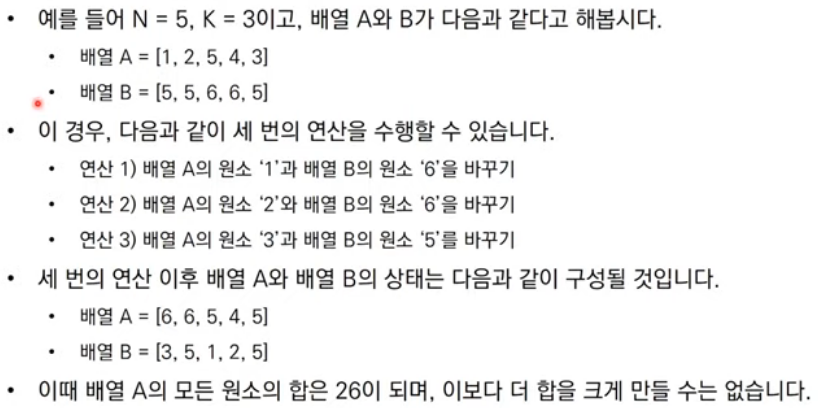  

**문제 해결 아이디어**  
- 핵심 아이디어 : 매번 배열 A에서 가장 작은 원소를 골라서, 배열 B에서 가장 큰 원소와 교체한다.
- 가장 먼저 배열 A와 B가 주어지면 A에 대하여 오름차순 정렬하고, B에 대하여 내림차순 정렬한다.
- 이후에 두 배열의 원소를 첫번째 인덱스부터 차례로 확인하면서 A의 원소가 B의 원소보다 작을 때에만 교체를 수행한다.
- 이 문제에서는 두 배열의 원소가 최대 100000개까지 입력될 수 있으므로, 최악의 경우 O(NlogN)을 보장하는 정렬 알고리즘을 이용해야 한다.

In [ ]:
# N, K를 입력 받기
n, k = map(int, input().split())
# 배열 A의 모든 원소를 입력 받기
a = list(map(int, input().split()))
# 배열 B의 모든 원소를 입력 받기
b = list(map(int, input().split()))

# 배열 A는 오름차순 정렬 수행
a.sort()
print(a)
# 배열 B는 내림차순 정렬 수행
b.sort(reverse=True)
print(b)

# 첫번째 인덱스부터 확인하며, 두 배열의 원소를 최대 K번 비교
for i in range(k):
    # A의 원소가 B의 원소보다 작은 경우
    if a[i] < b[i]:
        # 두 원소를 교체
        a[i], b[i] = b[i], a[i]
    else: # A의 원소가 B의 원소보다 크거나 같을 때, 반복문을 탈출
'''
5 3
1 2 5 4 3
5 5 6 6 5
'''